### Import Libraries

In [1]:
#For Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#For Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


### Load your dataset

In [2]:
data = pd.read_csv("Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data2=data.copy()
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#change totalcharges to float type
data2['TotalCharges']=pd.to_numeric(data2['TotalCharges'],errors='coerce')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

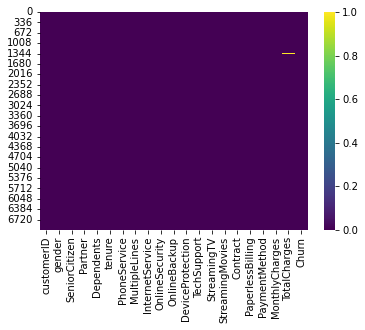

In [6]:
#Checking for missing data visually
sns.heatmap(data2.isnull(),cbar=True,cmap="viridis")

In [7]:
#To see the rows where there are missing data
nan_rows = data2[data2['TotalCharges'].isna()]
nan_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
#Replacing the missing values with the median 
median_total_charges= data2["TotalCharges"].median()
data2["TotalCharges"].fillna(median_total_charges,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Checking for duplicates
print(data2.duplicated().sum())

0


In [10]:
#Statistical description of the dataset
data2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
data2.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Univariate Analysis

Text(0.5, 1.0, 'Count of Contract ')

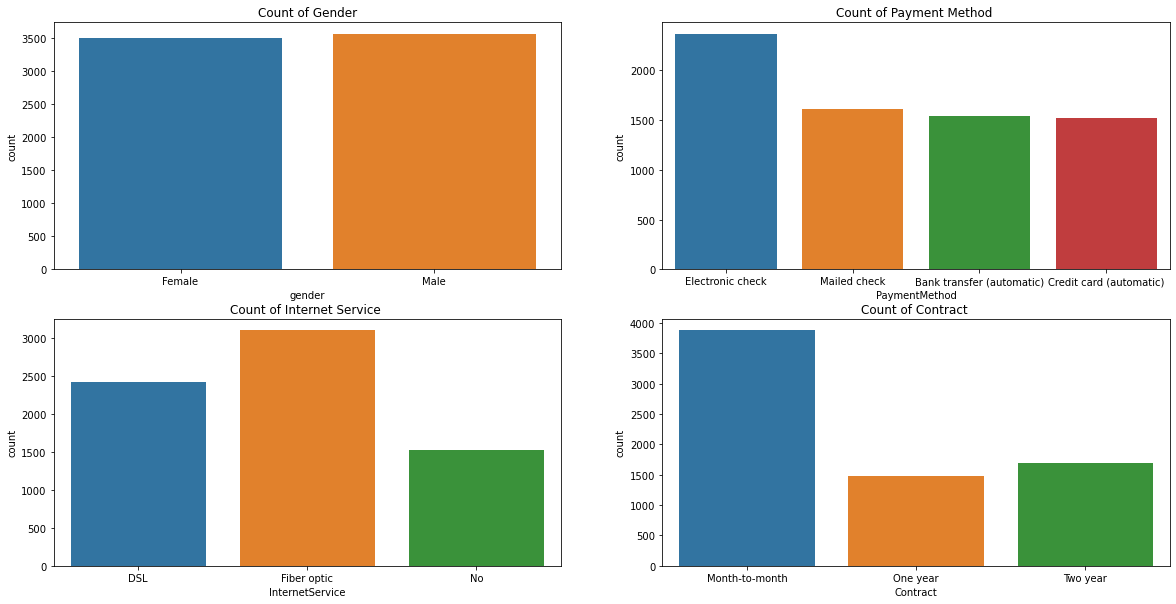

In [12]:
fig,ax= plt.subplots(figsize=(20,10),nrows=2,ncols=2,)
sns.countplot(data=data2, x="gender",ax=ax[0,0])
ax[0,0].set_title("Count of Gender")

sns.countplot(data=data2, x="PaymentMethod",ax=ax[0,1])
ax[0,1].set_title("Count of Payment Method ")

sns.countplot(data=data2, x="InternetService",ax=ax[1,0])
ax[1,0].set_title("Count of Internet Service ")

sns.countplot(data=data2, x="Contract",ax=ax[1,1])
ax[1,1].set_title("Count of Contract ")

### Observation
* There is a slight predominance of male customers compared to female customers
* Electronic check is the most commonly used Payment method among customers, followed by mailed check. Bank transfer (automatic) and credit card (automatic) have similar usage rates
* It's evident that the month-to-month contract is the most prevalent among customers, suggesting a preference for flexibility and short-term commitment.
* fiber optic service is the most popular choice of Internet Service among customers

Text(0.5, 1.0, 'Tenure ')

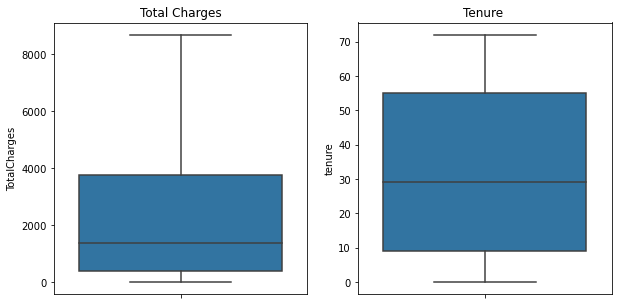

In [13]:
#univariate analysis on numerical data
fig,ax= plt.subplots(figsize=(10,5),nrows=1,ncols=2,)
sns.boxplot(data=data2, y="TotalCharges",ax=ax[0])
ax[0].set_title("Total Charges")

sns.boxplot(data=data2, y="tenure",ax=ax[1])
ax[1].set_title("Tenure ")



### Observation
* There are no outliers

## Bivariate Analysis

Text(0.5, 1.0, 'Frequecy of Contract ')

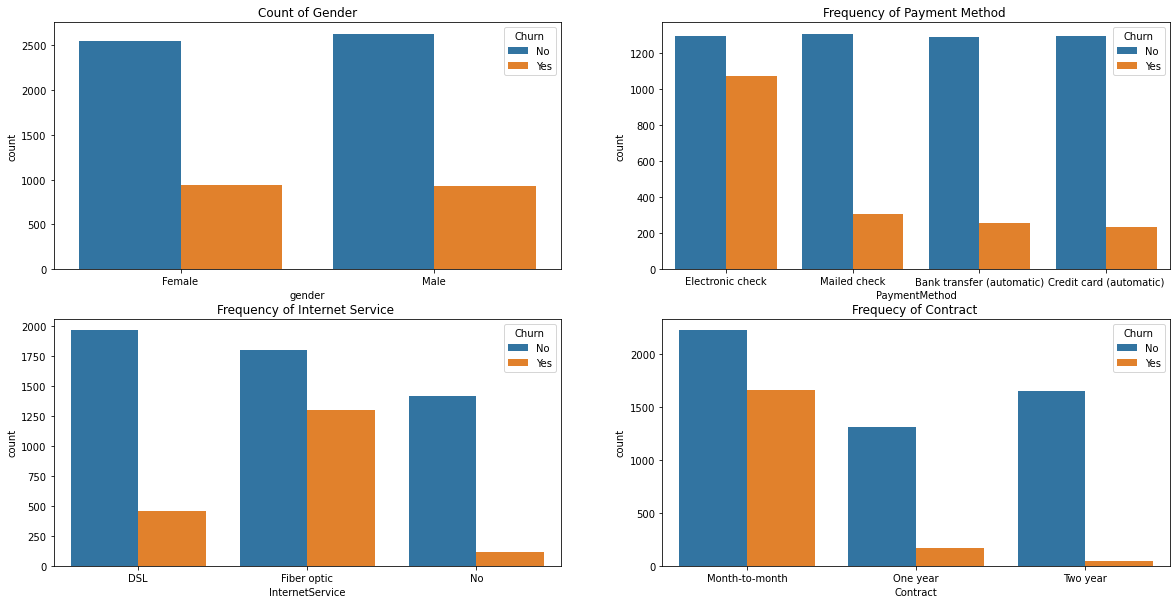

In [14]:
#Categorical
fig,ax= plt.subplots(figsize=(20,10),nrows=2,ncols=2)
sns.countplot(data=data2, x="gender",hue="Churn",ax=ax[0,0])
ax[0,0].set_title("Count of Gender")

sns.countplot(data=data2, x="PaymentMethod",hue="Churn",ax=ax[0,1])
ax[0,1].set_title("Frequency of Payment Method ")

sns.countplot(data=data2, x="InternetService", hue="Churn", ax=ax[1,0])
ax[1,0].set_title("Frequency of Internet Service ")

sns.countplot(data=data2, x="Contract",hue="Churn", ax=ax[1,1])
ax[1,1].set_title("Frequecy of Contract ")



### Observation

* both genders (male and female) have similar churn rates.Gender alone does not appear to be a strong predictor of churn among customers.

* customers who opt for electronic check payment are more likely to churn compared to other payment methods.All payment methods have a relatively similar number of customers who do not churn, indicating that payment method alone may not strongly influence churn behavior among customers.

* customers with month-to-month contracts have the highest churn rate, followed by those with one-year contracts, and two-year contracts have the lowest churn rate. while month-to-month contracts may be more susceptible to churn, they also attract customers who prefer flexibility and may not necessarily churn. However, customers with longer-term contracts (one-year and two-year) are less likely to churn, indicating that longer contract terms may contribute to higher customer retention rates.


* Fiber optic internet service has the highest churn rate, followed by DSL. while fiber optic service may be popular among customers, it is also associated with a higher likelihood of churn. On the other hand, DSL, despite having a lower churn rate, still retains a significant number of loyal customers. This suggests that factors other than internet service type may influence customer churn, such as pricing, service quality, or customer satisfaction.

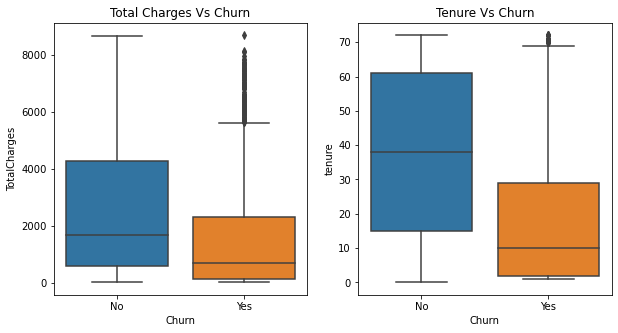

In [15]:
#Numrical
fig,ax=plt.subplots(figsize=(10, 5),nrows=1,ncols=2)

sns.boxplot(x='Churn', y="TotalCharges", data=data2,ax=ax[0])
ax[0].set_title("Total Charges Vs Churn")

sns.boxplot(x='Churn', y="tenure", data=data2,ax=ax[1])
ax[1].set_title("Tenure Vs Churn")

plt.show()

### Observation
* customers with higher total charges tend to churn less compared to customers with lower total charges.
* customers with longer tenure (i.e., longer duration of subscription) tend to churn less compared to customers with shorter tenure.
 There seems to be a negative correlation between tenure and churn, indicating that customers who have been with ConnectTel for a longer period are more likely to remain loyal and less likely to churn. 
This could be because customers who have been with the company longer may have developed stronger ties to the service, accumulated benefits over time, or become more satisfied with the service quality.

## Multivariate Analysis

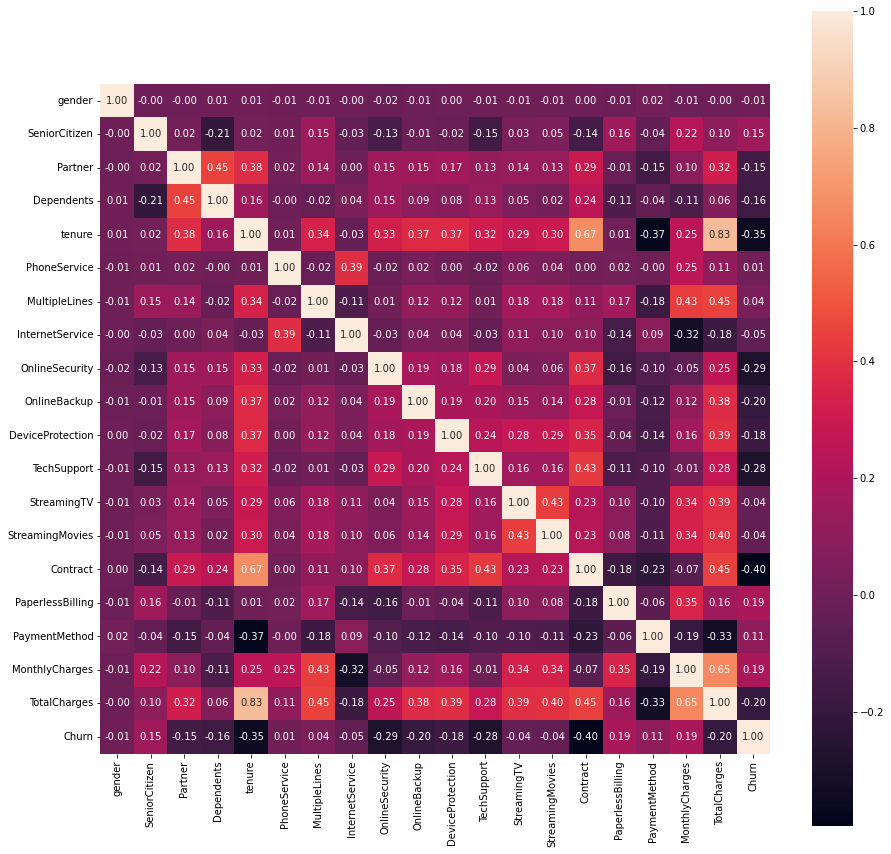

In [37]:
plt.figure(figsize=(15,15))
hm=sns.heatmap(data.corr(),cbar=True,annot=True,square=True,fmt=".2f",annot_kws={"size":10})

### Observation

## Data Preprocessing

In [17]:
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
#drop the customerID, we dont need it for ML
data2.drop(columns=['customerID'],axis=1, inplace=True)
data2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [19]:
#Encoding the dataset
encoder= LabelEncoder()

for c in data2.columns:
    if (data2[c].dtype =="object"):
        data2[c]=encoder.fit_transform(data2[c])
    else:
        data2[c]=data2[c]
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [20]:
#Normalization 
scaler=MinMaxScaler()

scaled_data=pd.DataFrame(scaler.fit_transform(data2),columns=data2.columns)
scaled_data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.227521,0.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847461,0.0
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.037809,0.0
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.033210,1.0


In [21]:
scaled_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
#Segment dataset into predictor variables and target variables

df=scaled_data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

target=scaled_data[['Churn']]


In [23]:
target.head()

,Churn
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [24]:
#split dataset into training and test sets
X_train,X_test,y_train,y_test= train_test_split(df,target,test_size=0.2,random_state=42)
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0.0,0.0,0.0,1.0,0.291667,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.5,0.0,1.000000,0.463682,0.152089
1623,0.0,0.0,0.0,0.0,0.750000,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.785572,0.589736
6074,1.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.051741,0.000537
1362,1.0,0.0,0.0,0.0,0.055556,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.516915,0.025288
6754,1.0,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.000000,0.434328,0.159090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,0.0,1.0,0.0,0.013889,1.0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.763682,0.008793
5191,0.0,0.0,1.0,1.0,0.319444,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,0.724876,0.251500
5226,1.0,0.0,1.0,1.0,0.166667,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.666667,0.028856,0.033147
5390,1.0,1.0,0.0,0.0,0.166667,1.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.807960,0.136320


In [25]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.065174,0.000692
2715,1.0,0.0,0.0,0.0,0.569444,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.000000,0.069652,0.112814
3825,0.0,0.0,1.0,1.0,0.722222,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.0,1.000000,0.010945,0.116882
1807,0.0,0.0,0.0,0.0,0.013889,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.578109,0.006641
132,1.0,0.0,0.0,0.0,0.930556,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.321393,0.374025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0.0,0.0,1.0,0.0,0.888889,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,0.498010,0.503116
315,1.0,0.0,1.0,1.0,0.708333,1.0,1.0,0.5,1.0,1.0,0.0,1.0,1.0,1.0,0.5,0.0,0.333333,0.913433,0.654004
2439,1.0,0.0,1.0,1.0,0.236111,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.000000,0.016418,0.035882
5002,0.0,0.0,1.0,1.0,0.958333,0.0,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.333333,0.255721,0.339407


## Modelling

In [26]:
#Logistic Regressionp
logreg=LogisticRegression()

logreg.fit(X_train,y_train)

logreg_pred=logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:",accuracy_score(y_test,logreg_pred))
print("Classification Report:\n",classification_report(y_test,logreg_pred))



Logistic Regression
Accuracy: 0.8161816891412349
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



### Insights from the model
*  it correctly classified about 81.6% of the instances in the dataset.
* Precision and Recall: For class 0 (non-churned customers), the precision is 0.86, meaning that among all the instances
    predicted as non-churned, 86% were correctly classified. The recall is 0.90, indicating that 90% of the actual non-churned 
    instances were correctly classified as non-churned by the model.For class 1 (churned customers), the precision is 0.68, 
    indicating that among all the instances predicted as churned, 68% were correctly classified. The recall is 0.58, 
    meaning that 58% of the actual churned instances were correctly classified as churned by the model.

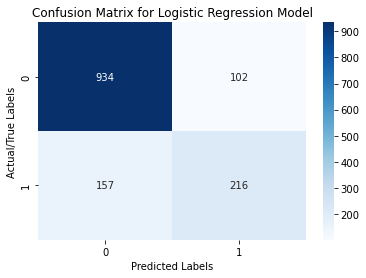

In [27]:
#visualizing the confusion matrix for Logistic Reg Model
lcm=confusion_matrix(y_test,logreg_pred)
sns.heatmap(lcm,annot=True,cmap="Blues",fmt="g")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual/True Labels")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

* True Negatives(934):it  correctly predicted that customers did not churn (class 0), and the actual label was also non-churned.
* False Negatives(157):it  incorrectly predicted that customers did not churn (class 0), but the actual label was churned (class 1). 
* True Positives(216),correctly predicted 216 instances where customers churned (class 1), and the actual label was also churned(True Positives).
* False Positives(102) it incorrectly predicted that customers churned (class 1), but the actual label was non-churned (class 0). In other words, the model falsely identified non-churned customers as churned.


In [29]:
#Random Forest Classifier
rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)
rfc_pred= rfc.predict(X_test)

print("Random Forest")
print("Accuracy:",accuracy_score(y_test,rfc_pred))
print("Classification Report:\n",classification_report(y_test,rfc_pred))



Random Forest
Accuracy: 0.7963094393186657
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1036
         1.0       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



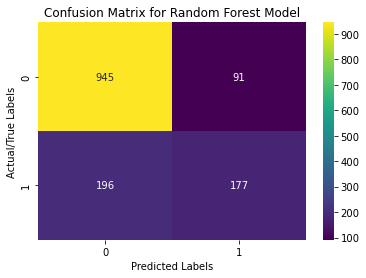

In [30]:
#visualizing the confusion matrix for Random Forest Model
rcm=confusion_matrix(y_test,rfc_pred)
sns.heatmap(rcm,annot=True,cmap="viridis",fmt="g")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual/True Labels")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

* the confusion matrix indicates that there are 949 true negatives,87 false positives,195 false negatives and 178 true positives.

In [31]:
#Decision Tree Classifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)
dt_pred= dt.predict(X_test)

print("Decision Tree")
print("Accuracy:",accuracy_score(y_test,dt_pred))
print("Classification Report:\n",classification_report(y_test,dt_pred))



Decision Tree
Accuracy: 0.723207948899929
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1036
         1.0       0.48      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.72      0.72      0.72      1409



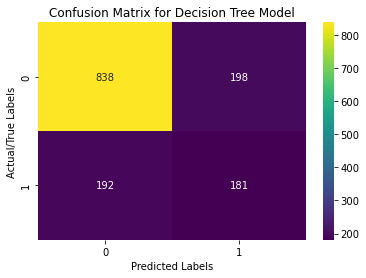

In [32]:
#visualizing the confusion matrix for Decision Tree Model
dcm=confusion_matrix(y_test,dt_pred)
sns.heatmap(dcm,annot=True,cmap="viridis",fmt="g")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual/True Labels")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

In [33]:
#XGB Classifier
xgb=XGBClassifier()

xgb.fit(X_train,y_train)
xgb_pred= xgb.predict(X_test)

print("XGB")
print("Accuracy:",accuracy_score(y_test,xgb_pred))
print("Classification Report:\n",classification_report(y_test,xgb_pred))



XGB
Accuracy: 0.7835344215755855
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1036
         1.0       0.61      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



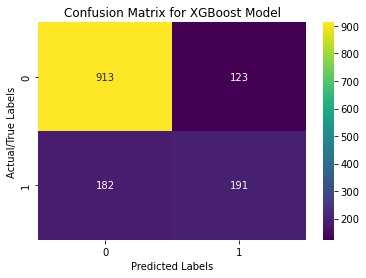

In [34]:
#visualizing the confusion matrix for XGB Model
xcm=confusion_matrix(y_test,xgb_pred)
sns.heatmap(xcm,annot=True,cmap="viridis",fmt="g")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual/True Labels")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

In [35]:
#SVC
gauss=GaussianNB()

gauss.fit(X_train,y_train)
gauss_pred= gauss.predict(X_test)

print("Guassian")
print("Accuracy:",accuracy_score(y_test,gauss_pred))
print("Classification Report:\n",classification_report(y_test,gauss_pred))



Guassian
Accuracy: 0.7579843860894251
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1036
         1.0       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



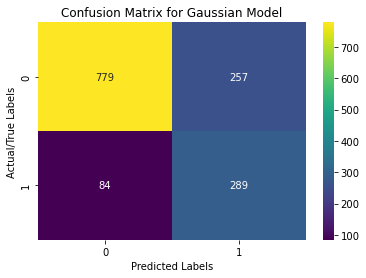

In [36]:
#visualizing the confusion matrix for Gaussian Model
gcm=confusion_matrix(y_test,gauss_pred)
sns.heatmap(gcm,annot=True,cmap="viridis",fmt="g")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual/True Labels")
plt.title("Confusion Matrix for Gaussian Model")
plt.show()

* Given that problem statement for the Company is churn rate, where customer churn poses a significant threat  to business sustainability and growth, the most important metrics for evaluating model performance would be Recall  and False Negatives.
*  False negatives (churned customers incorrectly classified as non-churned) represent missed opportunities to retain these valuable customers. ConnectTel should be more concerned with minimizing false negatives to ensure that no potentially churned customer goes unnoticed.